In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding='utf-8')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  16
Macbeth                 15
Maya                    12
The Outsider            12
Othello                 11
The Three Musketeers    11
Kismet                  11
Temptation              11
Freedom                 11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1197
1936    1139
1938    1129
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

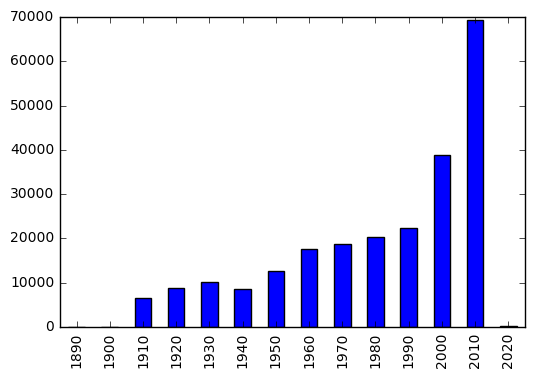

In [8]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

In [9]:
(titles.year // 10 * 10).value_counts()

2010    69217
2000    38776
1990    22306
1980    20302
1970    18766
1960    17547
1950    12720
1930    10104
1920     8803
1940     8583
1910     6511
2020      237
1900       37
1890        3
Name: year, dtype: int64

### Plot the number of "Hamlet" films made each decade.

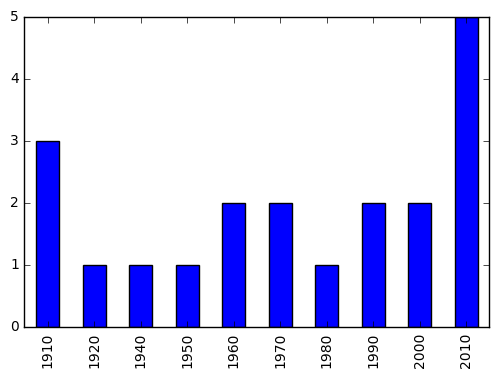

In [10]:
(titles[titles.title == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

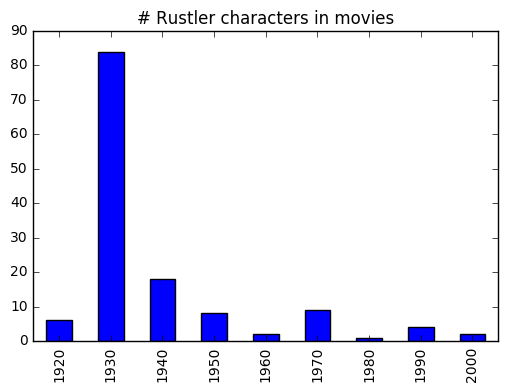

In [11]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(title = '# Rustler characters in movies', kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

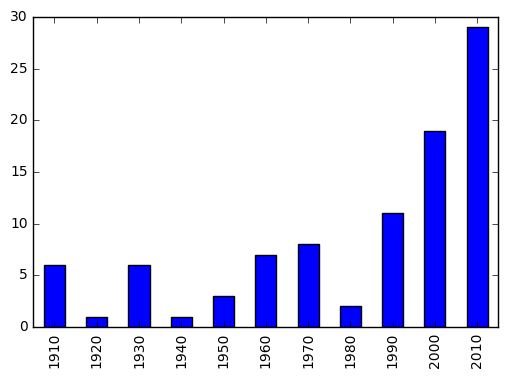

In [12]:
(cast[cast.character == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [13]:
cast.character.value_counts().head(11)

Himself        19638
Dancer         12073
Extra          11126
Reporter        8166
Doctor          7454
Student         7227
Policeman       6897
Party Guest     6808
Nurse           6692
Bartender       6631
Minor Role      6279
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [14]:
cast[cast.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      8
Hillary Clinton        7
Mary Jo Pehl           7
Joan Rivers            6
Marilyn Monroe         6
Sumie Sakai            6
Bunny Yeager           5
Caroline Rhea          5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [15]:
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             100
Richard Nixon             46
Ronald Reagan             39
John F. Kennedy           36
Winston Churchill         24
Benito Mussolini          23
George W. Bush            23
Ron Jeremy                23
Martin Luther King        22
Franklin D. Roosevelt     21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [16]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Frank O'Connor     27
Franklyn Farnum    26
Larry Steers       25
Edmund Cobb        24
Pierre Watkin      24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [17]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Mohanlal         15
Raj Babbar       15
Lou Scheimer     15
Asrani           13
Om Shivpuri      13
Deven Verma      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

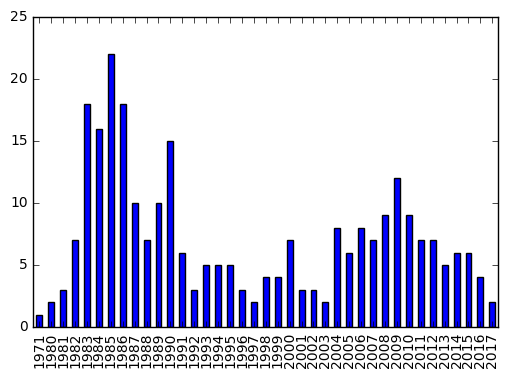

In [18]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [19]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [20]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Kid              5
Science Promo Cadet      5
Science                  4
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

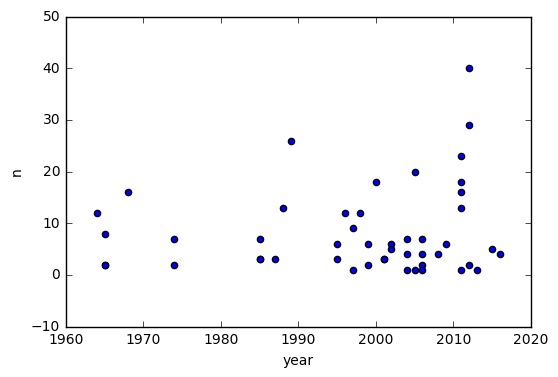

In [21]:
cast[(cast.name == 'Judi Dench') & (cast.n.notnull())].plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

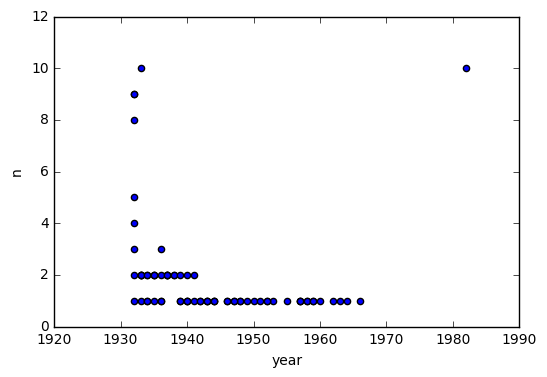

In [22]:
cast[(cast.name == 'Cary Grant') & cast.n.notnull()].plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

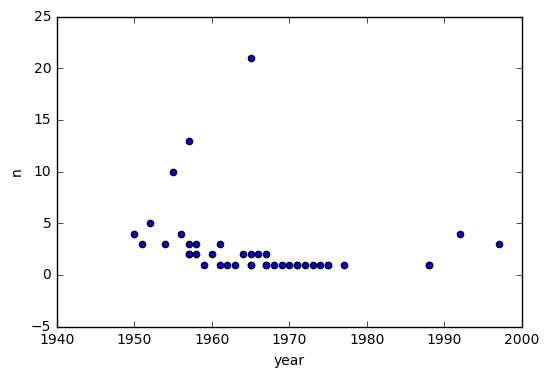

In [23]:
cast[(cast.name == 'Sidney Poitier') & cast.n.notnull()].plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [24]:
cast[cast.n == 1].type.value_counts()

actor      102443
actress     45738
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [25]:
cast[cast.n == 2].type.value_counts()

actor      75105
actress    63523
Name: type, dtype: int64